In [1]:
import cv2
import os
import random

import numpy as np
import pandas as pd

from collections import namedtuple
from matplotlib import pyplot as plt
from pathlib import Path

## Load Data

In [2]:
data_dir = '../data/'
images_dir = os.path.join(data_dir, 'images')

In [3]:
# data structure with image name and np.array data
Image = namedtuple('Image', ['name', 'data'])

In [4]:
labels_df = pd.read_csv(os.path.join(data_dir, 'gicsd_labels.csv'))

## Helper Functions

In [5]:
def _plot_value_counts(df, col, size=(18, 4), txtsize=10):
    """Helper function to plot value counts of column"""
    vc = labels_df[col].value_counts(dropna=False)
    x, y = vc.index, vc.values
    fig = plt.figure(figsize=size)
    plt.title(f'{col} value counts')
    plt.barh(x, y)
    for index, value in enumerate(y):
        plt.text(value, index, str(value), size=txtsize)

def _plot_images(images, n_cols=5, size=(12, 6), title=None):
    """Helper function to plot sampled images"""
    n_rows = int(np.ceil(len(images) / n_cols))
    fig, axs = plt.subplots(n_rows, n_cols, figsize=size)
    if title: fig.suptitle(title)
    axs = axs.flatten()
    for img, ax in zip(images, axs):
        ax.imshow(img.data, cmap='gray')
        ax.set_title(img.name)

# Data Exploration

In [7]:
labels_df.columns = labels_df.columns.str.replace(' ', '') # strip whitespace e.g. ' LABEL' 
labels_df = labels_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x) # strip whitespace

In [8]:
# The name of each file is GICSD_{CARD_ID}_{BACKGROUND_ID}_{IMAGE_ID}.png
labels_df[['CARD_ID', 'BACKGROUND_ID', 'IMAGE_ID']] = labels_df.apply(
    lambda row: pd.Series(row['IMAGE_FILENAME'][:-4].split('_')[1:]), axis=1)

# Add image height, width and channels
labels_df[['HEIGHT', 'WIDTH', 'CHANNELS']] = labels_df.apply(
    lambda row: pd.Series(cv2.imread(os.path.join(images_dir, row.IMAGE_FILENAME)).shape),
    axis=1)

In [9]:
labels_df.head()

IMAGE_FILENAME               LABEL CARD_ID BACKGROUND_ID IMAGE_ID  \
0   GICSD_1_0_3.png     FULL_VISIBILITY       1             0        3   
1  GICSD_1_0_13.png     FULL_VISIBILITY       1             0       13   
2  GICSD_1_1_33.png  PARTIAL_VISIBILITY       1             1       33   
3  GICSD_1_1_53.png     FULL_VISIBILITY       1             1       53   
4  GICSD_1_2_73.png     FULL_VISIBILITY       1             2       73   

   HEIGHT  WIDTH  CHANNELS  
0     192    192         3  
1     192    192         3  
2     192    192         3  
3     192    192         3  
4     192    192         3

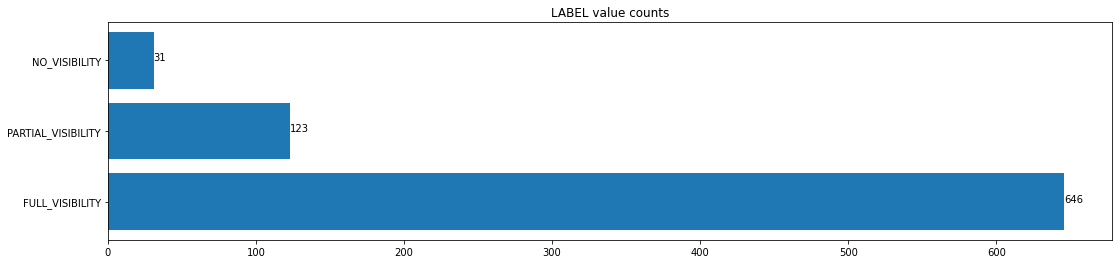

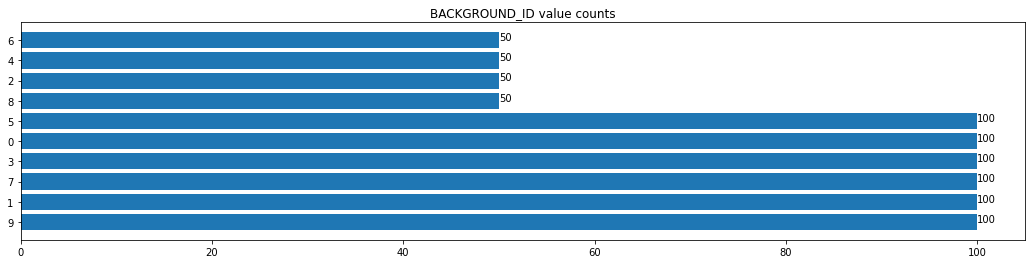

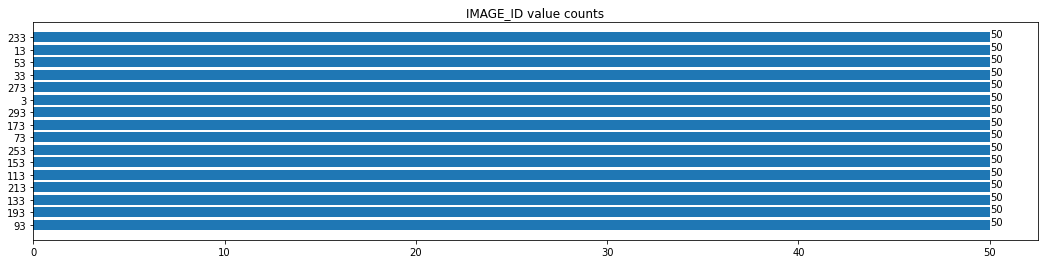

In [10]:
for col in ['LABEL', 'BACKGROUND_ID', 'IMAGE_ID']:
    _plot_value_counts(labels_df, col, size=(18, 4), txtsize=10) 

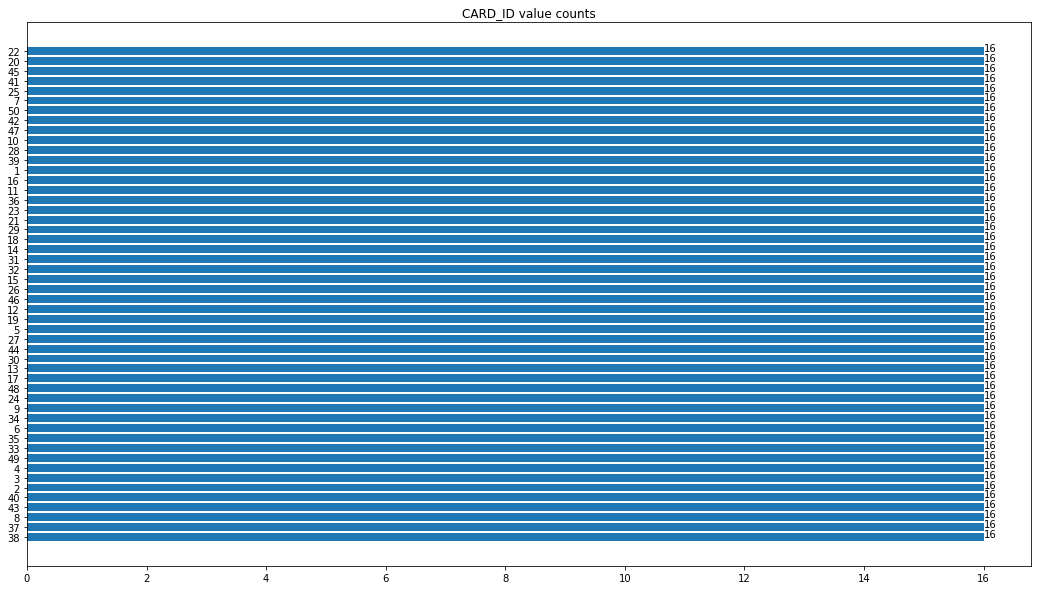

In [11]:
_plot_value_counts(labels_df, 'CARD_ID', size=(18, 10), txtsize=10) 

In [12]:
print(f'Unique image heights: {labels_df["HEIGHT"].unique()}\n'\
      f'Unique image widths: {labels_df["WIDTH"].unique()}\n'\
      f'Unique image channels: {labels_df["CHANNELS"].unique()}\n\n'\
      f'Unique image card_id: {labels_df["CARD_ID"].unique()}')

Unique image heights: [192]
Unique image widths: [192]
Unique image channels: [3]

Unique image card_id: ['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30'
 '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43' '44'
 '45' '46' '47' '48' '49' '50']


In [13]:
# Observations:
# 800 images, of same size (192, 192, 3)
# Label classes imbalanced with more images with full visibility (646), than partial (123), or none (31)
# 10 different BACKGROUND_ID values, wheree ven values have 50 images each, whilst odd values have 100
# 50 different CARD_ID values possible each with 16 images

## Sample random images and view

In [ ]:
n = 10

In [ ]:
random_images = labels_df['IMAGE_FILENAME'].sample(n).values
imgs = [cv2.imread(os.path.join(images_dir, i)) for i in random_images]
images = [Image(*i) for i in zip(random_images, imgs)]

In [ ]:
_plot_images(images)

### Plot in different colorspaces

In [ ]:
images_hsv = [Image(i.name, cv2.cvtColor(i.data, cv2.COLOR_BGR2HSV)) for i in images]
_plot_images(images_hsv, title='HSV')

In [ ]:
images_rgb = [Image(i.name, cv2.cvtColor(i.data, cv2.COLOR_BGR2RGB)) for i in images]
_plot_images(images_rgb, title='RGB')

In [ ]:
images_gray = [Image(i.name, cv2.cvtColor(i.data, cv2.COLOR_BGR2GRAY)) for i in images]
_plot_images(images_gray, title='GRAY')

### Split channels and view separate

In [ ]:
for num in range(3):
    channel = [Image(i.name, i.data[:,:,num]) for i in images]
    _plot_images(channel, title=f'channel{num+1}')

In [ ]:
# Observations:
# Channel 1 contains image data
# Channels 2,3 in image corrupted, these to be removed

### View images sample by LABEL 

In [ ]:
for label in labels_df['LABEL'].unique():
    random_images = labels_df.loc[labels_df['LABEL'] == label, 'IMAGE_FILENAME'].sample(n).values
    imgs = [cv2.imread(os.path.join(images_dir, i))[:,:,0] for i in random_images]
    images = [Image(*i) for i in zip(random_images, imgs)]
    _plot_images(images, title=f'label: {label}')

### View images sample by BACKGROUND_ID 

In [ ]:
for background in labels_df['BACKGROUND_ID'].unique():
    random_images = labels_df.loc[labels_df['BACKGROUND_ID'] == background, 'IMAGE_FILENAME'].sample(n).values
    imgs = [cv2.imread(os.path.join(images_dir, i))[:,:,0] for i in random_images]
    images = [Image(*i) for i in zip(random_images, imgs)]
    _plot_images(images, title=f'background: {background}')

### View images sample by IMAGE_ID 

In [ ]:
for image in labels_df['IMAGE_ID'].unique():
    random_images = labels_df.loc[labels_df['IMAGE_ID'] == image, 'IMAGE_FILENAME'].sample(n).values
    imgs = [cv2.imread(os.path.join(images_dir, i))[:,:,0] for i in random_images]
    images = [Image(*i) for i in zip(random_images, imgs)]
    _plot_images(images, title=f'image_id: {image}')

for image in labels_df['IMAGE_ID'].unique():
    random_images = labels_df.loc[labels_df['IMAGE_ID'] == image, 'IMAGE_FILENAME'].sample(n).values
    imgs = [cv2.imread(os.path.join(images_dir, i))[:,:,0] for i in random_images]
    images = [Image(*i) for i in zip(random_images, imgs)]
    _plot_images(images, title=f'image_id: {image}')

In [14]:
n = 10

In [15]:
random_images = labels_df['IMAGE_FILENAME'].sample(n).values
imgs = [cv2.imread(os.path.join(images_dir, i)) for i in random_images]
images = [Image(*i) for i in zip(random_images, imgs)]

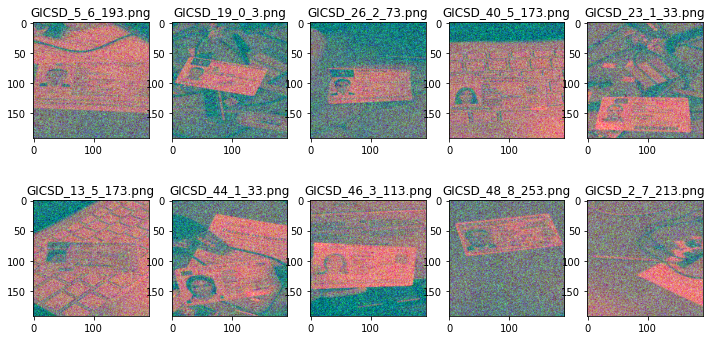

In [16]:
_plot_images(images)

### Plot in different colorspaces

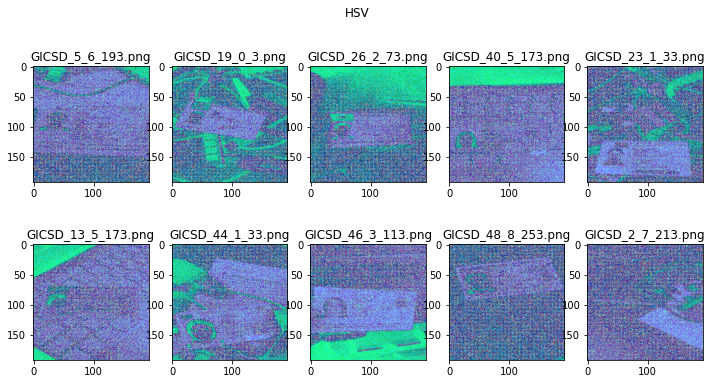

In [17]:
images_hsv = [Image(i.name, cv2.cvtColor(i.data, cv2.COLOR_BGR2HSV)) for i in images]
_plot_images(images_hsv, title='HSV')

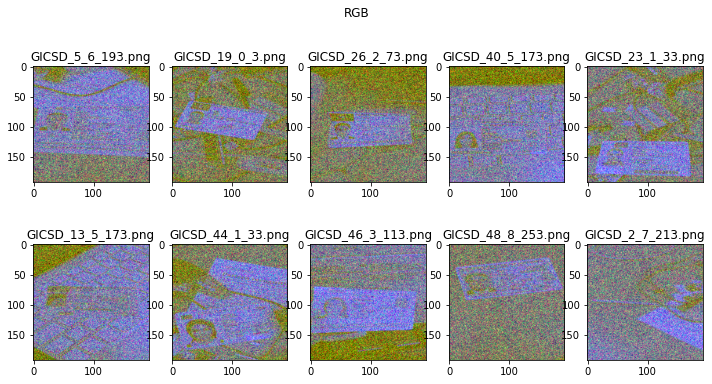

In [18]:
images_rgb = [Image(i.name, cv2.cvtColor(i.data, cv2.COLOR_BGR2RGB)) for i in images]
_plot_images(images_rgb, title='RGB')

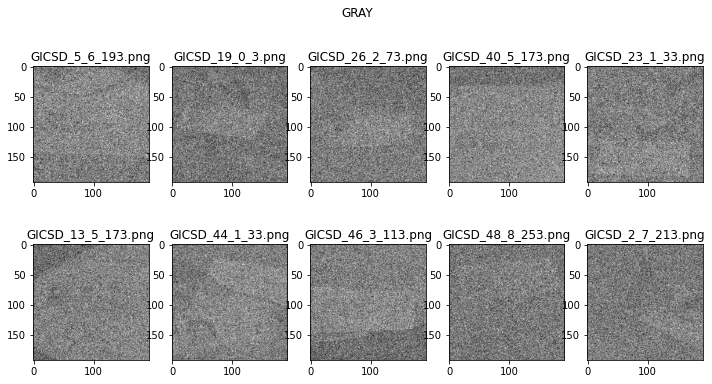

In [19]:
images_gray = [Image(i.name, cv2.cvtColor(i.data, cv2.COLOR_BGR2GRAY)) for i in images]
_plot_images(images_gray, title='GRAY')

### Split channels and view separate

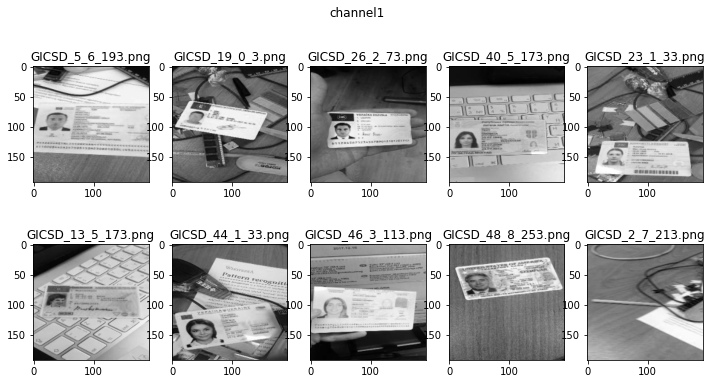

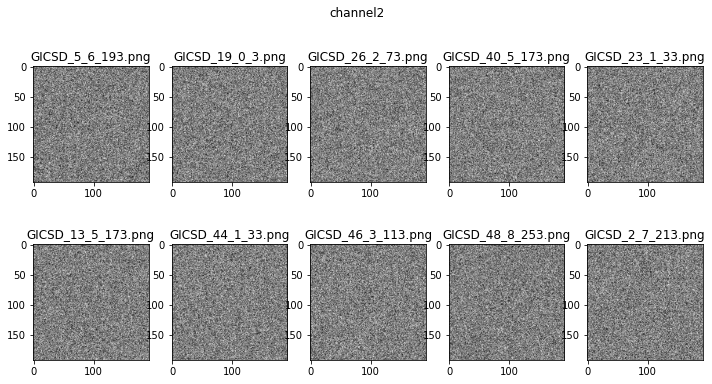

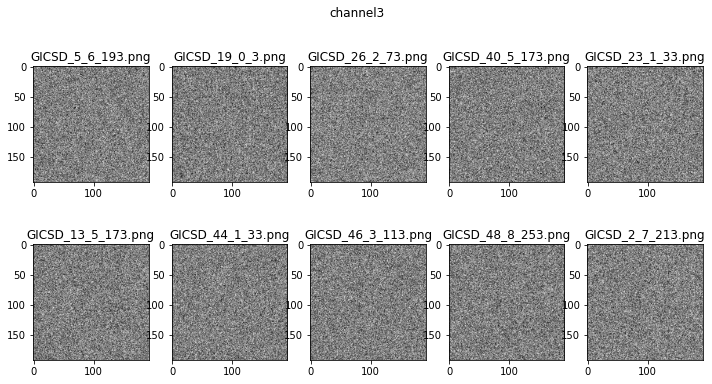

In [20]:
for num in range(3):
    channel = [Image(i.name, i.data[:,:,num]) for i in images]
    _plot_images(channel, title=f'channel{num+1}')

In [21]:
# Observations:
# Channel 1 contains image data
# Channels 2,3 in image corrupted, these to be removed

### View images sample by LABEL 

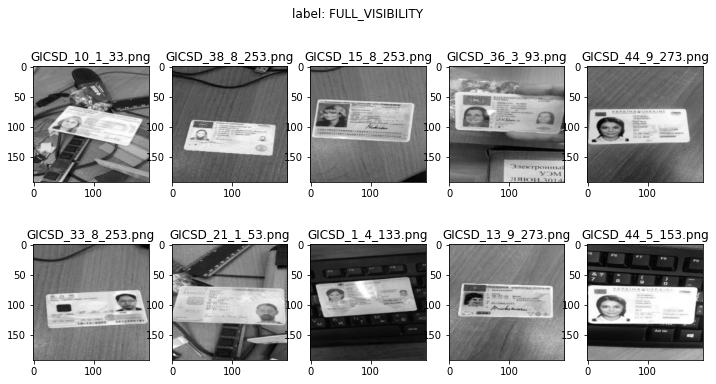

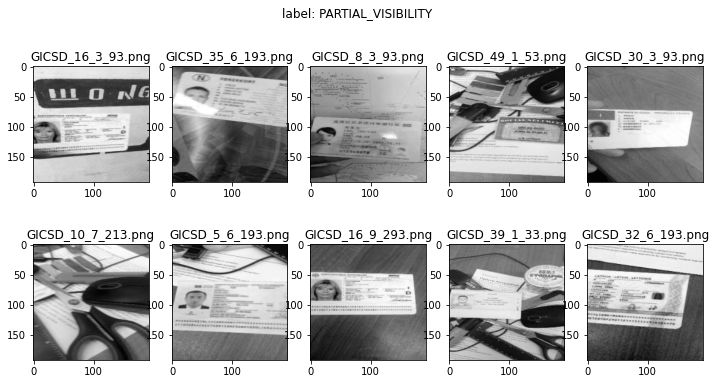

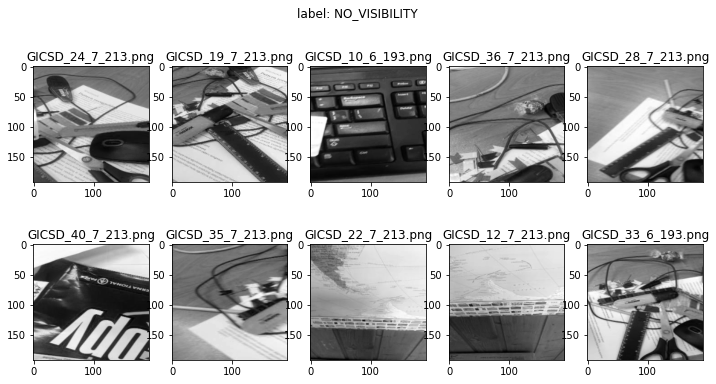

In [38]:
for label in labels_df['LABEL'].unique():
    random_images = labels_df.loc[labels_df['LABEL'] == label, 'IMAGE_FILENAME'].sample(n).values
    imgs = [cv2.imread(os.path.join(images_dir, i))[:,:,0] for i in random_images]
    images = [Image(*i) for i in zip(random_images, imgs)]
    _plot_images(images, title=f'label: {label}')

### View images sample by BACKGROUND_ID 

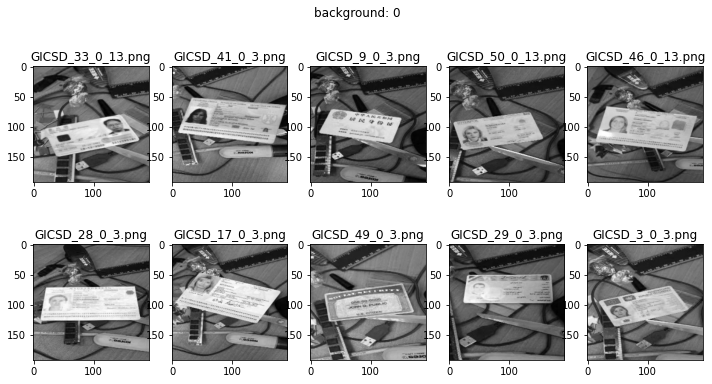

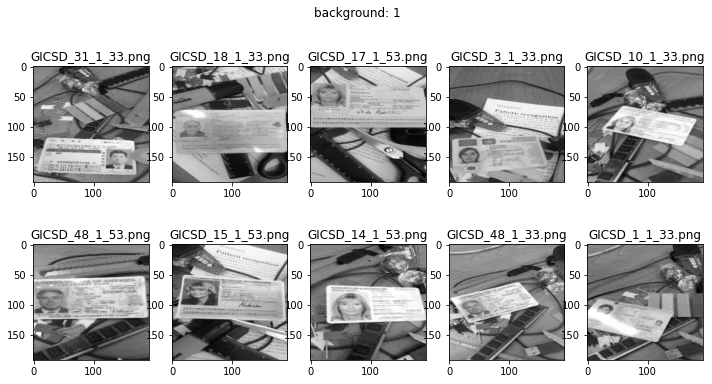

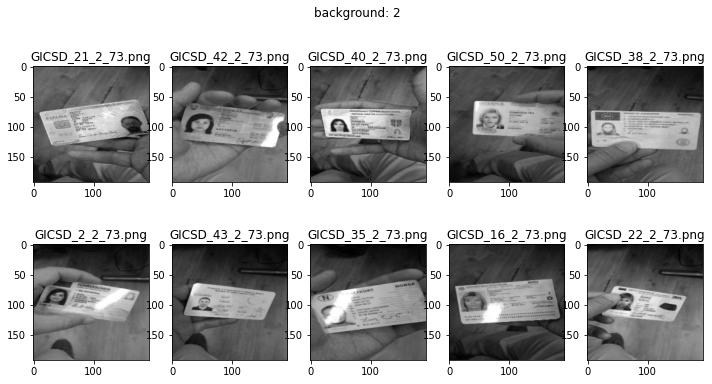

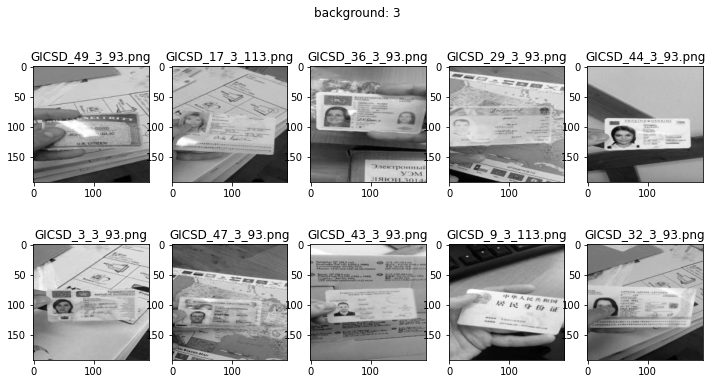

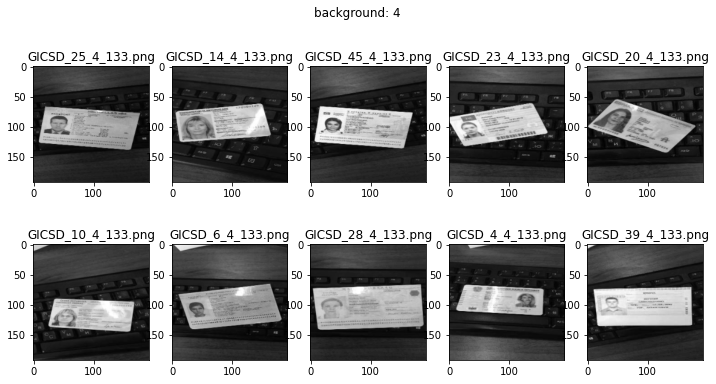

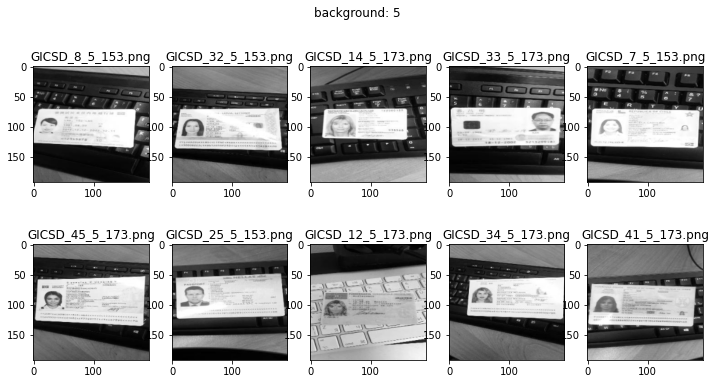

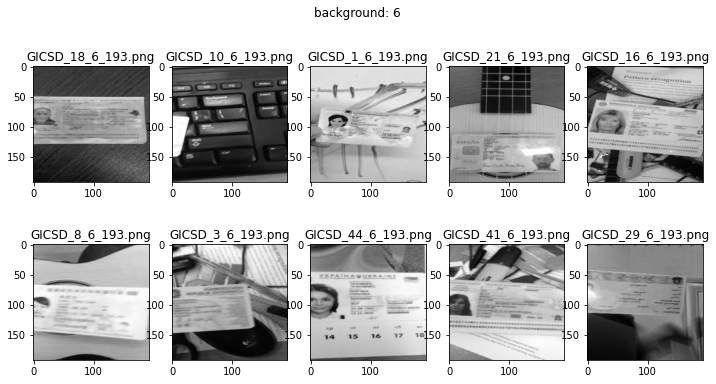

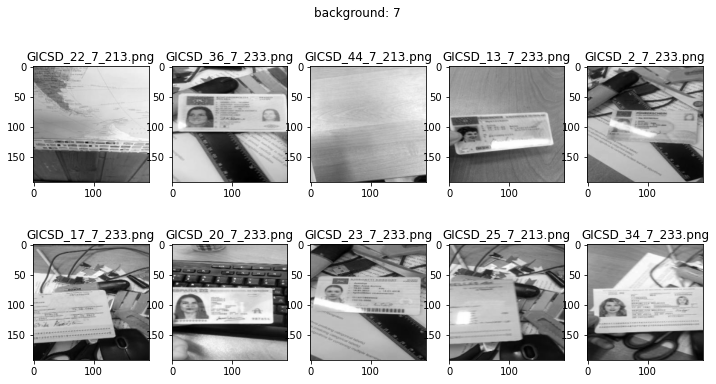

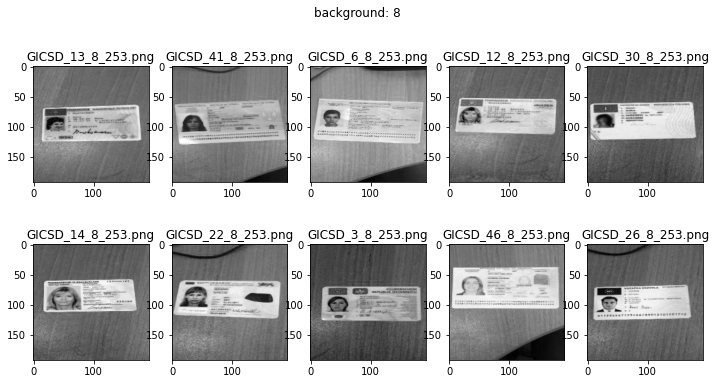

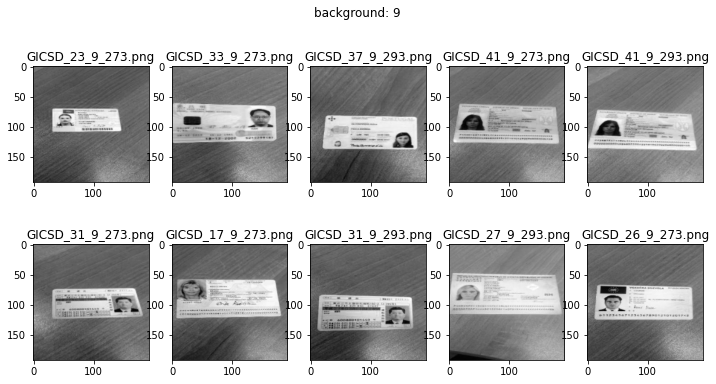

In [41]:
for background in labels_df['BACKGROUND_ID'].unique():
    random_images = labels_df.loc[labels_df['BACKGROUND_ID'] == background, 'IMAGE_FILENAME'].sample(n).values
    imgs = [cv2.imread(os.path.join(images_dir, i))[:,:,0] for i in random_images]
    images = [Image(*i) for i in zip(random_images, imgs)]
    _plot_images(images, title=f'background: {background}')

### View images sample by IMAGE_ID 

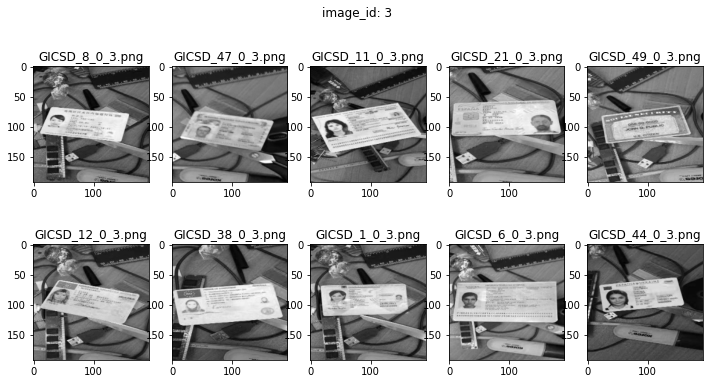

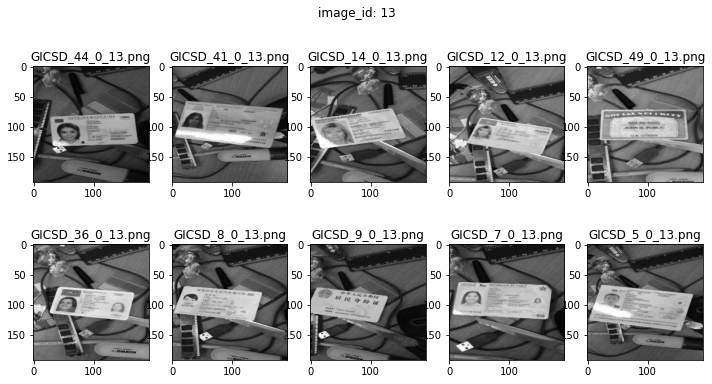

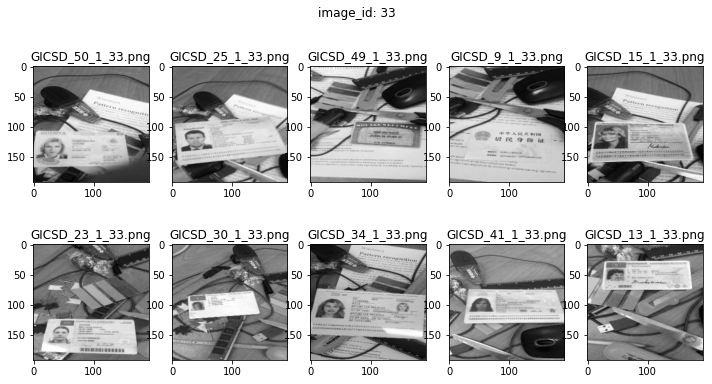

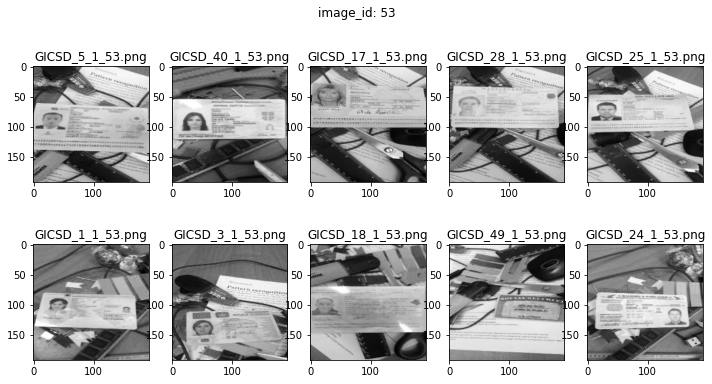

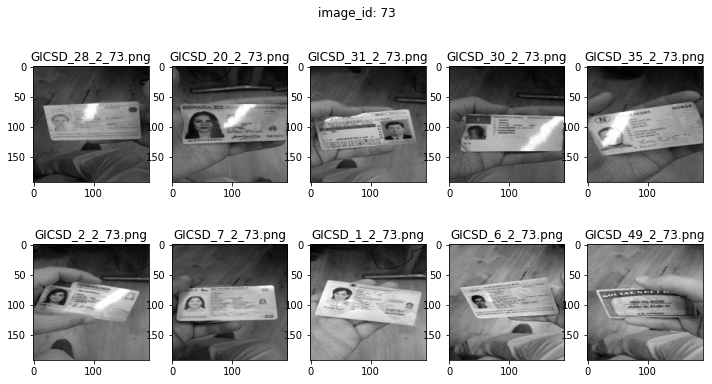

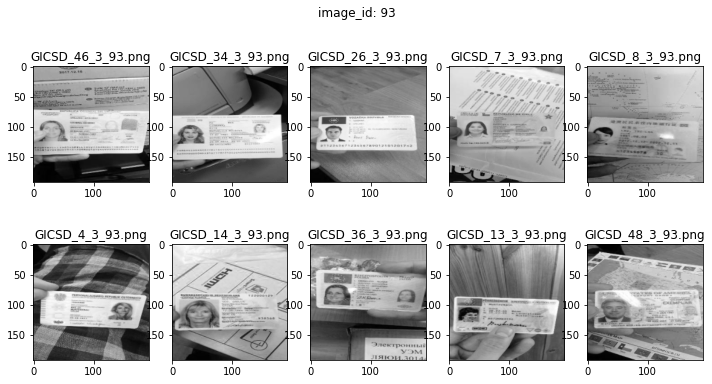

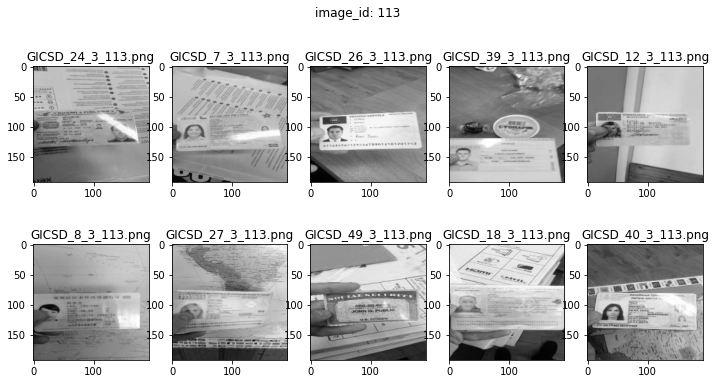

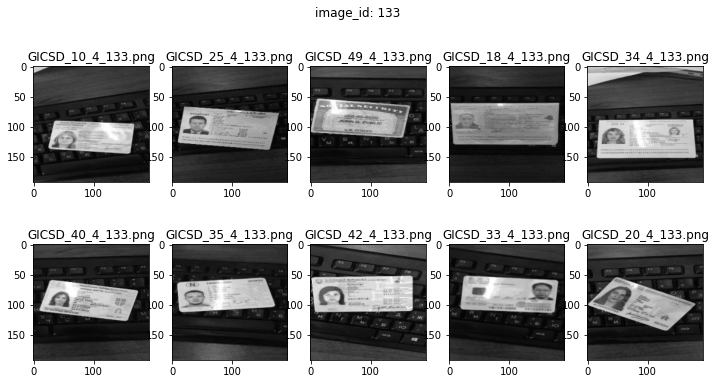

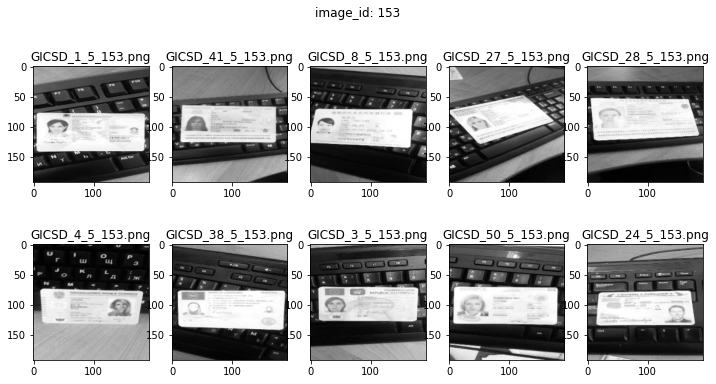

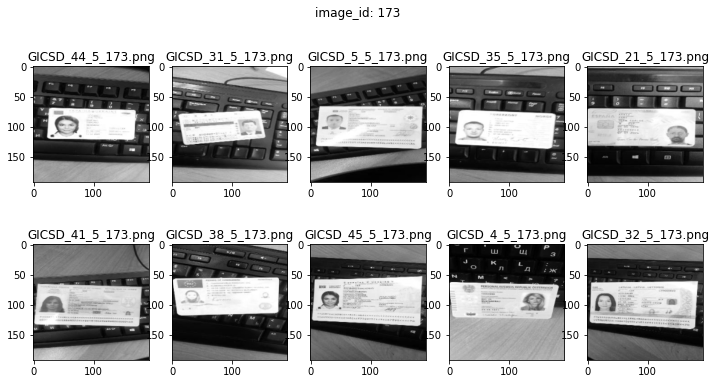

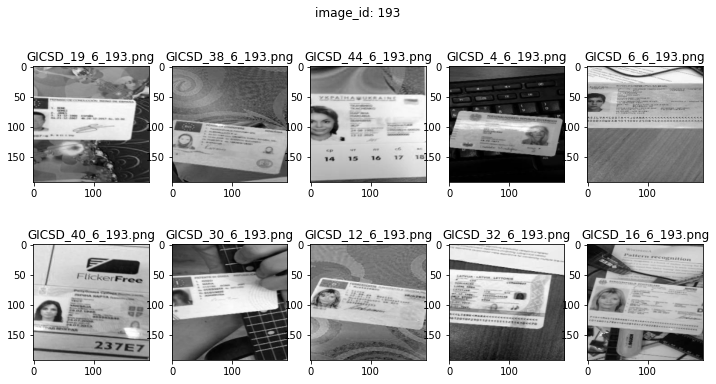

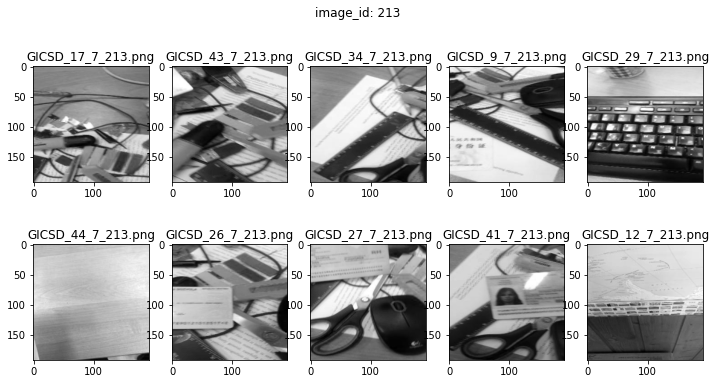

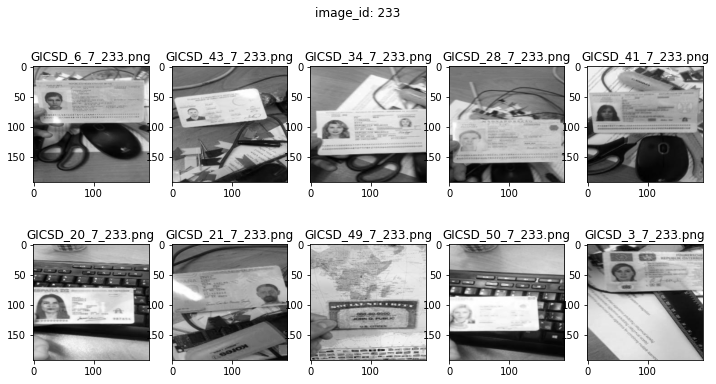

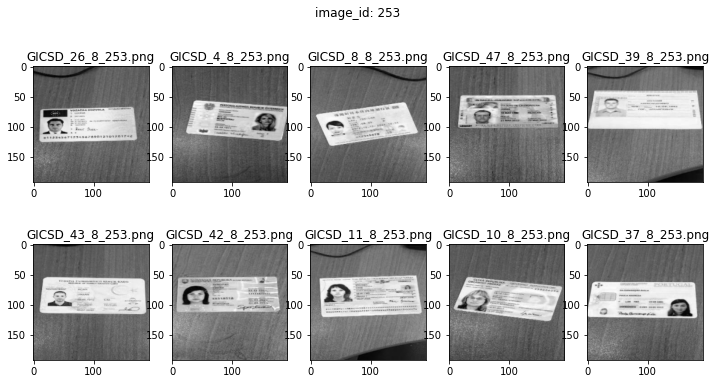

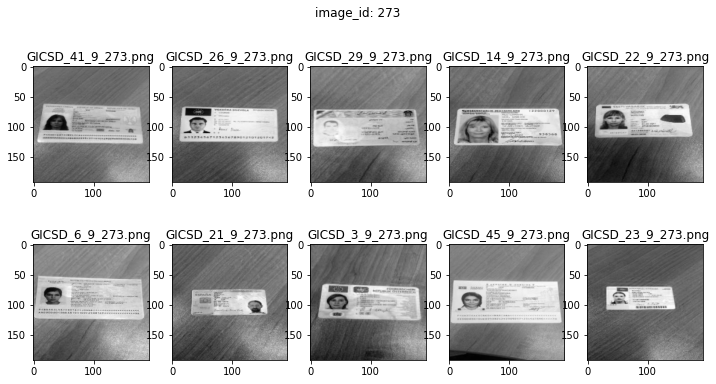

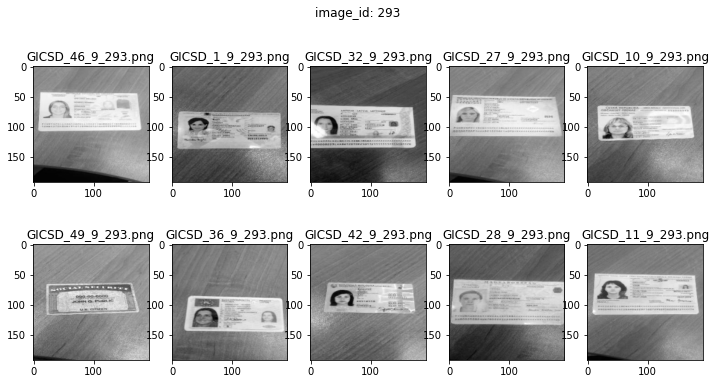

In [42]:
for image in labels_df['IMAGE_ID'].unique():
    random_images = labels_df.loc[labels_df['IMAGE_ID'] == image, 'IMAGE_FILENAME'].sample(n).values
    imgs = [cv2.imread(os.path.join(images_dir, i))[:,:,0] for i in random_images]
    images = [Image(*i) for i in zip(random_images, imgs)]
    _plot_images(images, title=f'image_id: {image}')